In [1]:
 # Chapter 4 Numpy 기본: 배열과 벡터 연산

In [2]:
# NumPy는 Numerical Python의 줄임말로, 파이썬에서 산술 계산을 위한 가장 중요한 필수 패키지 중 하나다. 

In [3]:
# 과학 계산을 위한 대부분의 패키지는 NumPy의 배열 객체를 데이터 교환을 위한 공통 언어처럼 사용한다.

In [4]:
# NumPy에서 제공하는 것들은 다음과 같다.
# 효율적인 다차원 배열인 ndarray는 빠른 배열 계산과 유연한 브로드캐스팅 기능을 제공한다.
# 반복문을 작성할 필요 없이 전체 데이터 배열을 빠르게 계산할 수 있는 표준 수학 함수
# 배열 데이터를 디스크에 쓰거나 읽을 수 있는 도구와 메모리에 적재된 파일을 다루는 도구
# 선형대수, 난수 생성기, 푸리에 변환 기능
# C, C++, 포트란으로 작성한 코드를 연결할 수 있는 C API

In [5]:
# NumPy 자체는 모델링이나 과학 계산을 위한 기능을 제공하지 않으므로 먼저 NumPy 배열과 배열 기반 연산에 대한 이해를 한 다음 pandas 같은 배열 기반 도구를 사용하면 훨씬 더 효율적이다. 

In [6]:
# NumPy는 일반적인 산술 데이터 처리를 위한 기반 라이브러리를 제공하기 때문에 많은 독자가 통계나 분석, 특히 표 형식의 데이터를 처리하기 위해 pandas를 사용하기 원할 것이다. 
# 또한 pandas는 NumPy에는 없는 시계열 처리 같은 다양한 도메인 특화 기능을 제공한다.

In [7]:
# NumPy가 파이썬 산술 계산 영역에서 중요한 위치를 차지하는 이유 중 하나는 대용량 데이터 배열을 효율적으로 다룰 수 있도록 설계되었다는 점이다. 

In [8]:
# 성능 차이를 확인하기 위해 백만 개의 정수를 저장하는 NumPy 배열과 파이썬 리스트를 비교해보자.

In [9]:
import numpy as np

In [10]:
my_arr = np.arange(1000000)

In [11]:
my_list = list(range(1000000))

In [12]:
# 이제 각각의 배열과 리스트 원소에 2를 곱해보자

In [13]:
%time for _ in range(10): my_arr2 = my_arr * 2

CPU times: user 20.9 ms, sys: 3.98 ms, total: 24.9 ms
Wall time: 63.3 ms


In [14]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 1.2 s, sys: 237 ms, total: 1.44 s
Wall time: 1.6 s


In [15]:
# NumPy를 사용한 코드가 순수 파이썬으로 작성한 코드보다 열 배에서 백 배 이상 빠르고 메모리도 더 적게 사용하는 것을 확인할 수 있다.

In [16]:
# 4.1 NumPy ndarray: 다차원 배열 객체

In [17]:
# NumPy의 핵심 기능 중 하나는 ndarray라고 하는 N차원의 배열 객체인데 파이썬에서 사용할 수 있는 대규모 데이터 집합을 담을 수 있는 빠르고 유연한 자료구조다.
# 배열은 스칼라 원소 간의 연산에 사용하는 문법과 비슷한 방식을 사용해서 전체 데이터 블록에 수학적인 연산을 수행할 수 있도록 해준다. 

In [18]:
# 파이썬 내장 객체의 스칼라 값을 다루는 것과 유사한 방법으로 에서 배치 계산을 처리하는 방법을 알아보기 위해 우선 NumPy 패키지를 임포트하고 임의의 값이 들어 있는 작은 배열을 만들어보겠다.

In [19]:
import numpy as np

In [20]:
data = np.random.randn(2, 3)

In [21]:
data

array([[ 0.15201771, -0.64244573,  0.26637227],
       [-0.11692366, -0.18415084,  0.0650635 ]])

In [22]:
# 그리고 그 값에 산술 연산을 해보자. 

In [23]:
data * 10

array([[ 1.5201771 , -6.42445727,  2.66372272],
       [-1.16923656, -1.84150836,  0.65063495]])

In [24]:
data + data

array([[ 0.30403542, -1.28489145,  0.53274454],
       [-0.23384731, -0.36830167,  0.13012699]])

In [25]:
# 첫 번째 예제는 모든 원소의 값에 10을 곱했다. 두 번째 예제는 data 배열에서 같은 위치의 값끼리 서로 더했다.

In [26]:
# ndarray는 같은 종류의 데이터를 담을 수 있는 포괄적인 다차원 배옇이다.
# ndarray의 모든 원소는 같은 자료형이어야 한다. 
# 모든 배열은 각 차원의 크기를 알려주는 shape라는 튜플과 배열에 저장된 자료형을 알려주는 dtype이라는 객체를 가지고 있다.

In [27]:
data.shape

(2, 3)

In [28]:
data.dtype

dtype('float64')

In [29]:
# 4.1.1 ndarray 생성하기

In [30]:
# 배열을 생성하는 가장 쉬운 방법은 array 함수를 이용하는 것이다. 순차적인 객체(다른 배열도 포함하여)를 넘겨받고, 넘겨받은 데이터가 들어 있는 새로운 NumPy 배열을 생성한다. 

In [31]:
# 예를 들어 파이썬의 리스트는 변환하기 좋은 예다.

In [32]:
data1 = [6, 7.5, 8, 0, 1]

In [33]:
arr1 = np.array(data1)

In [34]:
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [35]:
# 같은 길이를 가지는 리스트를 내포하고 있는 순차 데이터는 다차원 배열로 변환 가능하다.

In [36]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]

In [37]:
arr2 = np.array(data2)

In [38]:
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [39]:
# data2는 리스트를 담고 있는 리스트이므로 NumPy 배열인 arr2는 해당 데이터로부터 형태를 추론하여 2차원 형태로 생성된다. ndim과 shape 속성을 검사해서 이를 확인할 수 있다.

In [40]:
arr2.ndim

2

In [41]:
arr2.shape

(2, 4)

In [42]:
# 명시적으로 지정하지 않는 한 np.array는 생성될 때 적절한 자료형을 추론한다. 그렇게 추론된 자료형은 dtype 객체에 저장되는데 앞서 살펴본 예제에서 확인해보면 다음과 같다.

In [43]:
arr1.dtype  

dtype('float64')

In [44]:
arr2.dtype

dtype('int64')

In [45]:
# 또한 np.array는 새로운 배열을 생성하기 위한 여러 함수를 가지고 있는데, 예를 들어 zeros와 ones는 주어진 길이나 모양에 각각 0과 1이 들어있는 배열을 생성한다. 

In [46]:
# empty 함수는 초기화되지 않은 배열을 생성한다. 이런 메서드를 사용해서 다차원 배열을 생성하려면 원하는 형태의 튜플을 넘기면 된다.

In [47]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [48]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [49]:
np.zeros((2, 3, 2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

In [50]:
# np.empty는 0으로 초기화된 배열을 반환하지 않는다. 앞서 살펴본 바와 같이 대부분의 경우 np.empty는 초기화되지 않은 "가비지"값으로 채워진 배열을 반환한다.

In [51]:
# arange는 파이썬의 range 함수의 배열 버전이다.

In [52]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [53]:
# 표 4-1은 표준 배열 생성 함수의 목록이다. NumPy는 산술 연산에 초점이 맞춰져 있기 때문에 만약 자료형을 명시하지 않으면 float64(부동소수점)가 될 것이다. 페이지 139쪽

In [54]:
# 4.1.2 ndarray의 dtype

In [55]:
# dtype은 ndarray가 메모리에 있는 특정 데이터를 해석하기 위해 필요한 정보(또는 메타데이터)를 담고 있는 특수한 객체다. 

In [56]:
arr1 = np.array([1, 2, 3], dtype=np.float64)

In [57]:
arr2 = np.array([1, 2, 3], dtype=np.int32)

In [58]:
arr1.dtype

dtype('float64')

In [59]:
arr2.dtype

dtype('int32')

In [60]:
# dtype이 있기에 NumPy가 강력하면서도 유연한 도구가 될 수 있었는데, 대부분의 경우 데이터는 디스크에서 데이터를 읽고 쓰기 편하도록 하위 레벨의 표현에 직접적으로 맞춰져 있다.
# 따라서 C나 포트란 같은 저수준 언어로 작성된 코드와 쉽게 연동이 가능하다. 

In [61]:
# 산술 데이터의 dtype은 float나 int 같은 자료형의 이름과 하나의 원소가 차지하는 비트 수로 이루어진다.
# 파이썬의 float 객체에서 사용되는 표준 배정밀도 부동소수점 값은 8바이트 혹은 64비트로 이루어지는데 이 자료형은 NumPy에서 float64로 표현된다.

In [62]:
# 표 4-2는 NumPy가 지원하는 모든 자료형의 목록이다. 페이지 140쪽 NumPy 자료형

In [63]:
# ndarray의 astype 메서드를 사용해서 배열의 dtype을 다른 형으로 명시적으로 변환(또는 캐스팅) 가능하다. 

In [64]:
arr = np.array([1, 2, 3, 4, 5])

In [65]:
arr.dtype

dtype('int64')

In [66]:
float_arr = arr.astype(np.float64)

In [67]:
float_arr.dtype

dtype('float64')

In [68]:
# 위 예제에서는 정수형을 부동소수점으로 변환했다. 만약 부동소수점수를 정수형 dtype으로 변환하면 소수점 아래 자리는 버려진다.

In [69]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])

In [70]:
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [71]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

In [72]:
# 숫자 형식의 문자열을 담고 있는 배열이 있다면 astype을 사용하여 숫자로 변환할 수 있다. 

In [73]:
numeric_strings = np.array(["1.25", "-9.6", "42"], dtype = np.string_)

In [74]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [75]:
# 주의! NumPy에서 문자열 데이터는 고정 크기를 가지며 별다른 경고를 출력하지 않고 입력을 임의로 잘라낼 수 있으므로 numpy.string_형을 이용할 때는 주의하는 것이 좋다. 
# pandas는 숫자 형식이 아닌 경우에 좀 더 직관적인 사용성을 제공한다.

In [76]:
# 만일 어떤 이유(문자열이 float64형으로 변환되지 않는 경우와 같은)로 형변환이 실패하면 ValueError 예외가 발생한다. 
# 위 예에서 나는 귀찮아서 np.float64 대신 float라고 입력했는데 똑똑한 NumPy는 파이썬 자료형을 알맞은 dtype으로 맞춰준다.

In [77]:
# 다른 배열의 dtype 속성을 이용하는 것도 가능하다.

In [78]:
int_array = np.arange(10)

In [79]:
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype = np.float64)

In [80]:
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [81]:
# dtype으로 사용할 수 있는 축약 코드도 있다. 

In [82]:
empty_uint32 = np.empty(8, dtype = "u4")

In [83]:
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

In [84]:
# Note! astype을 호출하면 새로운 dtype이 이전 dtype과 동일해도 항상 새로운 배열을 생성(데이터를 복사)한다.

In [85]:
# 4.1.3 NumPy 배열의 산술 연산

In [86]:
# 배열의 중요한 특징은 for 문을 작성하지 않고 데이터를 일괄 처리할 수 있다는 것이다. 이를 벡터화라고 하는데, 같은 크기의 배열 간의 산술 연산은 배열의 각 원소 단위로 적용된다.

In [87]:
arr = np.array([[1, 2, 3], [4, 5, 6]])

In [88]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [89]:
arr * arr

array([[ 1,  4,  9],
       [16, 25, 36]])

In [90]:
arr - arr

array([[0, 0, 0],
       [0, 0, 0]])

In [91]:
# 스칼라 인자가 포함된 산술 연산의 경우 배열 내의 모든 원소에 스칼라 인자가 적용된다.

In [92]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [93]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [94]:
# 같은 크기를 가지는 배열 간의 비교 연산은 불리언 배열을 반환한다.

In [95]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])

In [96]:
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [97]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

In [98]:
# 크기가 다른 배열 간의 연산은 브로드캐스팅이라고 하는데 12장에서 자세히 다루자. 이 책을 이해하기 위해 브로드캐스팅을 깊이 알고 있을 필요는 없다.

In [99]:
# 4.1.4 색인과 슬라이싱 기초

In [100]:
# NumPy 배열 색인에 대해서, 데이터의 부분집합이나 개별 요소를 선택하기 위한 수많은 방법이 존재한다. 1차원 배열은 단순한데, 표면적으로는 파이썬의 리스트와 유사하게 동작한다.

In [101]:
arr = np.arange(10)

In [102]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [103]:
arr[5]

5

In [104]:
arr[5:8]

array([5, 6, 7])

In [105]:
arr[5:8] = 12

In [106]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [107]:
# 위에서 볼 수 있듯이 arr[5:8] = 12처럼 배열 조각에 스칼라값을 대입하면 12가 선택 영역 전체로 전파(또는 브로드캐스팅)된다. 
# 리스트와의 차이점 중 중요한 점은 배열 조각은 원본 배열의 뷰라는 점이다. 즉, 데이터는 복사되지 않고 뷰에 대한 변경은 그대로 원본 배열에 반영된다. 

In [108]:
# 이에 대한 예제로 먼저 arr 배열의 슬라이스를 생성해보자.

In [109]:
arr_slice = arr[5:8]

In [110]:
arr_slice

array([12, 12, 12])

In [111]:
# 그리고 arr_slice의 값을 변경하면 원래 배열인 arr의 값도 바뀌어 있음을 확인할 수 있다.

In [112]:
arr_slice[1] = 12345

In [113]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [114]:
# 단순히 [:]로 슬라이스를 하면 배열의 모든 값을 할당한다.

In [115]:
arr_slice[:] = 64

In [116]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [117]:
# NumPy를 처음 접한다면, 특히 데이터 복사가 자주 일어나는 다른 배열 프로그래밍 언어를 사용해본 적이 있다면 데이터가 복사되지 않는다는 점은 놀랄 만한 사실이다. 
# NumPy는 대용량의 데이터 처리를 염두에 두고 설계되었기 때문에 만약 NumPy가 데이터 복사를 남발한다면 성능과 메모리 문제에 마주치게 될 것이다.

In [118]:
# 주의! 만약에 뷰 대신 ndarray 슬라이스의 복사본을 얻고 싶다면 arr[5:8].copy()를 사용해서 명시적으로 배열을 복사해야 한다.

In [119]:
# 다차원 배열을 다룰 때는 좀 더 많은 옵션이 있다. 2차원 배열에서 각 색인에 해당하는 요소는 스칼라값이 아니라 1차원 배열이다.

In [120]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [121]:
arr2d[2]

array([7, 8, 9])

In [122]:
# 따라서 개별 요소는 재귀적으로 접근해야 한다. 하지만 그렇게 하기는 귀찮기 때문에 콤마로 구분된 색인 리스트를 넘기면 된다. 그러므로 다음 두 표현은 동일하다.

In [123]:
arr2d[0][2]

3

In [124]:
arr2d[0, 2]

3

In [125]:
# 그림 [4-1](페이지 146)에 2차원 배열에 대한 색인을 나타냈다. 0번 축을 "로우"로 생각하고 1번 축을 "컬럼"으로 생각하면 이해하기 쉽다.

In [126]:
# 다차원 배열에서 마지막 색인을 생략하면 반환되는 객체는 상위 차원의 데이터를 포함하고 있는 한 차원 낮은 ndarray가 된다. 2x2x3 크기의 배열 arr3d가 있다면

In [127]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

In [128]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [129]:
# arr3d[0]은 2 x 3 크기의 배열이다.

In [130]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [131]:
# arr3d[0]에는 스칼라값과 배열 모두 대입할 수 있다. 

In [132]:
old_values = arr3d[0].copy()

In [133]:
arr3d[0] = 42

In [134]:
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [135]:
arr3d[0] = old_values

In [136]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [137]:
# 이런 식으로 arr3d[1, 0]은 (1, 0)으로 색인되는 1차원 배열과 그 값을 반환한다.

In [138]:
arr3d[1, 0]

array([7, 8, 9])

In [139]:
# 이 표현은 다음처럼 두 번에 걸쳐 인덱싱한 결과와 동일하다.

In [140]:
x = arr3d[1]

In [141]:
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [142]:
x[0]

array([7, 8, 9])

In [143]:
# 여기서 살펴본 선택된 배열의 부분집합은 모두 배열의 뷰를 반환한다는 점이다. 

In [144]:
# 슬라이스로 선택하기

In [145]:
# 파이썬의 리스트 같은 1차원 객체처럼 ndarray는 익숙한 문법으로 슬라이싱할 수 있다.

In [146]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [147]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [148]:
# 위에서 살펴본 arr2d를 생각해보자. 이 배열을 슬라이싱하는 방법은 조금 다르다.

In [149]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [150]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [151]:
# 확인한 것처럼 첫 번째 축인 0번 축을 기준으로 슬라이싱되었다. 따라서 슬라이스는 축을 따라 선택 영역 내의 요소를 선택한다. 
# 'arr2d의 시작부터 두 번째 로우까지의 선택'이라고 이해하면 쉽다. 

In [152]:
# 색인을 여러 개 넘겨서 다차원을 슬라이싱하는 것도 가능하다.

In [153]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [154]:
# 이렇게 슬라이싱하면 항상 같은 차원의 배열에 대한 뷰를 얻게 된다. 정수 색인과 슬라이스를 함께 사용해서 한 차원 낮은 슬라이스를 얻을 수 있다. 

In [155]:
# 예를 들어 두 번째 로우에서 처음 두 컬럼만 선택하고 싶다면 아래처럼 하면 된다. 

In [156]:
arr2d[1, :2]

array([4, 5])

In [157]:
# 이와 유사하게 처음 두 로우에서 세 번째 컬럼만 선택하고 싶다면 아래처럼 하면 된다.

In [158]:
arr2d[:2, 2]

array([3, 6])

In [159]:
# [그림 4-2] 참고(페이지 149), 그냥 콜론만 쓰면 전체 축을 선택한다는 의미이므로 이렇게 하면 원래 차원의 슬라이스를 얻게 된다.

In [160]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [161]:
# 물론 슬라이싱 구문에 값을 대입하면 선택 영역 전체에 값이 대입된다. 

In [162]:
arr2d[:2, 1:] = 0

In [163]:
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

In [164]:
# 4.1.5 불리언값으로 선택하기

In [165]:
# 중복된 이름이 포함된 배열이 있다고 하자. 그리고 numpy.random 모듈에 있는 randn 함수를 사용해서 임의의 표준 정규 분포 데이터를 생성하자.

In [166]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])

In [167]:
data = np.random.randn(7, 4)

In [168]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [169]:
data

array([[-1.5192754 , -0.52123   ,  1.20290859, -2.27372939],
       [ 0.54815735,  0.44918339, -0.04735985,  1.31437008],
       [-0.02723508, -0.56190325,  0.88122417, -1.41720924],
       [ 0.95734869,  1.95369783, -0.78350139, -0.25358485],
       [ 0.0809994 ,  0.63814608,  0.5913061 , -0.35696879],
       [-0.248776  ,  1.51590347,  1.27245398, -0.25086586],
       [ 0.71054051,  0.30630649,  0.30138796,  1.34740214]])

In [170]:
# 각각의 이름은 data 배열의 각 로우에 대응한다고 가정하자. 
# 만약에 전체 로우에서 "Bob"과 같은 이름을 선택하려면 산술 연산과 마찬가지로 배열에 대한 비교 연산(== 같은)도 벡터화되므로 names를 "Bob" 문자열과 비교하면 불리언 배열을 반환한다.

In [171]:
names == "Bob"

array([ True, False, False,  True, False, False, False])

In [172]:
# 이 불리언 배열은 배열의 색인으로 사용할 수 있다. 

In [173]:
data[names == "Bob"]

array([[-1.5192754 , -0.52123   ,  1.20290859, -2.27372939],
       [ 0.95734869,  1.95369783, -0.78350139, -0.25358485]])

In [174]:
# 불리언 배열은 반드시 색인하려는 축의 길이와 동일한 길이를 가져야 한다. 불리언 배열 색인도 슬라이스나 요소를 선택하는 데 짜 맞출 수 있다. 

In [175]:
# Caution! 불리언값으로 배열을 선택할 때는 불리언 배열의 크기가 다르더라도 실패하지 않는다. 불리언 배열 색인도 슬라이스나 요소를 선택하는 데 짜맞출 수 있다.

In [176]:
# 다음 예제에서는 names == "Bob"인 로우에서 2: 컬럼을 선택했다. 

In [177]:
data[names == "Bob", 2:]

array([[ 1.20290859, -2.27372939],
       [-0.78350139, -0.25358485]])

In [178]:
data[names == "Bob", 3]

array([-2.27372939, -0.25358485])

In [179]:
# "Bob"이 아닌 요소들을 선택하려는 != 연산자를 사용하거나 ~를 사용해서 조건절을 부인하면 된다.

In [180]:
names != "Bob"

array([False,  True,  True, False,  True,  True,  True])

In [181]:
data[~(names == "Bob")]

array([[ 0.54815735,  0.44918339, -0.04735985,  1.31437008],
       [-0.02723508, -0.56190325,  0.88122417, -1.41720924],
       [ 0.0809994 ,  0.63814608,  0.5913061 , -0.35696879],
       [-0.248776  ,  1.51590347,  1.27245398, -0.25086586],
       [ 0.71054051,  0.30630649,  0.30138796,  1.34740214]])

In [182]:
# ~ 연산자는 일반적인 조건을 반대로 쓰고 싶을 때 유용하다.

In [183]:
cond = names == "Bob"

In [184]:
data[~cond]

array([[ 0.54815735,  0.44918339, -0.04735985,  1.31437008],
       [-0.02723508, -0.56190325,  0.88122417, -1.41720924],
       [ 0.0809994 ,  0.63814608,  0.5913061 , -0.35696879],
       [-0.248776  ,  1.51590347,  1.27245398, -0.25086586],
       [ 0.71054051,  0.30630649,  0.30138796,  1.34740214]])

In [185]:
# 세 가지 이름 중에서 두 가지 이름을 선택하려면 &(and)나 |(or) 같은 논리 연산자를 사용한 여러 개의 불리언 조건을 사용하면 된다.

In [186]:
mask = (names == "Bob") | (names == "Will")

In [187]:
mask

array([ True, False,  True,  True,  True, False, False])

In [188]:
data[mask]

array([[-1.5192754 , -0.52123   ,  1.20290859, -2.27372939],
       [-0.02723508, -0.56190325,  0.88122417, -1.41720924],
       [ 0.95734869,  1.95369783, -0.78350139, -0.25358485],
       [ 0.0809994 ,  0.63814608,  0.5913061 , -0.35696879]])

In [189]:
# 배열에 불리언 색인을 이용해서 데이터를 선택하면 반환되는 배열의 내용이 바뀌지 않더라도 항상 데이터 복사가 발생한다.

In [190]:
# Caution! 파이썬 예약어인 and와 or은 불리언 배열에서는 사용할 수 없다. 대신 &(and)와 |(or)을 사용한다.

In [191]:
# 불리언 배열에 값을 대입하는 것은 상식적으로 이루어진다. data에 저장된 모든 음수를 0으로 대입하려면 다음과 같이 하면 된다.

In [192]:
data[data < 0]

array([-1.5192754 , -0.52123   , -2.27372939, -0.04735985, -0.02723508,
       -0.56190325, -1.41720924, -0.78350139, -0.25358485, -0.35696879,
       -0.248776  , -0.25086586])

In [193]:
data

array([[-1.5192754 , -0.52123   ,  1.20290859, -2.27372939],
       [ 0.54815735,  0.44918339, -0.04735985,  1.31437008],
       [-0.02723508, -0.56190325,  0.88122417, -1.41720924],
       [ 0.95734869,  1.95369783, -0.78350139, -0.25358485],
       [ 0.0809994 ,  0.63814608,  0.5913061 , -0.35696879],
       [-0.248776  ,  1.51590347,  1.27245398, -0.25086586],
       [ 0.71054051,  0.30630649,  0.30138796,  1.34740214]])

In [194]:
# 1차원 불리언 배열을 사용해서 전체 로우나 컬럼을 선택하는 것은 쉽게 할 수 있다.

In [195]:
data[names != "Joe"] = 7

In [196]:
data

array([[ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 0.54815735,  0.44918339, -0.04735985,  1.31437008],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [-0.248776  ,  1.51590347,  1.27245398, -0.25086586],
       [ 0.71054051,  0.30630649,  0.30138796,  1.34740214]])

In [197]:
# 나중에 살펴보겠지만 2차원 데이터에 대한 이런 유형의 연산은 pandas를 이용해서 처리하는 것이 편리하다.

In [198]:
# 4.1.6 팬시 색인

In [199]:
# 팬시 색인은 정수 배열을 사용한 색인을 설명하기 위해 NumPy에서 차용한 단어다. 8 x 4 배열이 있다고 하자.

In [200]:
arr = np.empty((8, 4))

In [201]:
for i in range(8):
  arr[i] = i

In [202]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [203]:
# 특정한 순서로 로우를 선택하고 싶다면 그냥 원하는 순서가 명시된 정수가 담긴 ndarray나 리스트를 넘기면 된다.

In [204]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [205]:
# 다음 코드가 독자의 예상대로 실행되기 바란다. 색인으로 음수를 사용하면 끝에서부터 로우를 선택한다.

In [206]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [207]:
# 다차원 색인 배열을 넘기는 것은 조금 다르게 동작하는데, 각각의 색인 튜플에 대응하는 1차원 배열이 선택된다.

In [208]:
arr = np.arange(32).reshape((8, 4))

In [209]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [210]:
# reshape 메서드는 부록 A에서 더 자세히 살펴본다.

In [211]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [212]:
# 여기서 결과를 보면 (1, 0), (5, 3), (7, 1), (2, 2)에 대응하는 원소들이 선택되었다. 

In [213]:
# 배열이 몇 차원이든지(여기서는 2차원) 팬시 색인의 결과는 항상 1차원이다. 

In [214]:
# 이 예제에서 팬시 색인은 나를 포함한 사용자들이 기대하는 것과는 조금 다르게 동작했다. 
# 행렬의 행(로우)과 열(컬럼)에 대응하는 사각형 모양의 값이 선택되기를 기대했는데 그렇게 하려면 아래처럼 하면 된다.

In [215]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [216]:
# 4.1.7 배열 전치와 축 바꾸기

In [217]:
# 배열 전치는 데이터를 복사하지 않고 데이터의 모양이 바뀐 뷰를 반환하는 특별한 기능이다. 
# ndarray는 transpose 메서드와 T라는 이름의 특수한 속성을 가지고 있다. 

In [218]:
arr = np.arange(15).reshape((3, 5))

In [219]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [220]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [221]:
# 행렬 계산을 할 때 자주 사용하게 될 텐데, 예를 들어 행렬의 내적은 np.dot을 이용해서 구할 수 있다.

In [222]:
arr = np.random.randn(6, 3)

In [223]:
arr

array([[ 0.72501529,  0.45273793,  0.24752863],
       [-0.6872077 ,  1.33207551, -1.14989459],
       [ 1.02241686, -0.83803603, -1.22718064],
       [ 1.56015549, -0.14013404,  0.14434777],
       [ 0.74043176,  0.3953816 ,  2.23083662],
       [ 0.75108224,  1.19155185,  1.30519875]])

In [224]:
# 다차원의 배열의 경우 transpose 메서드는 튜플로 축 번호를 받아서 치환한다.

In [225]:
arr = np.arange(16).reshape((2, 2, 4))

In [226]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [227]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [228]:
# 이 예제에서 첫 번째와 두 번째의 축 순서가 뒤바뀌었고 마지막 축은 그대로 남았다. 

In [229]:
# T 속성을 이용하는 간단한 전치는 축을 뒤바꾸는 특별한 경우다. ndarray에는 swapaxes라는 메서드가 있는데 두 개의 축 번호를 받아서 배열을 뒤바꾼다. 

In [230]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [231]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

In [232]:
# swapaxes도 마찬가지로 데이터를 복사하지 않고 원래 데이터에 대한 뷰를 반환한다.

In [233]:
# 4.2 유니버셜 함수: 배열의 각 원소를 빠르게 처리하는 함수

In [234]:
# ufunc라고 불리기도 하는 유니버셜 함수는 ndarray 안에 있는 데이터 원소별로 연산을 수행하는 함수다. 
# 유니버셜 함수는 하나 이상의 스칼라값을 받아서 하나 이상의 스칼라 결괏값을 반환하는 간단한 함수를 고속으로 수행할 수 있는 벡터화된 래퍼 함수라고 생각하면 된다.

In [235]:
# 많은 ufunc는 sqrt나 exp 같은 간단한 변형을 전체 원소에 적용할 수 있다.

In [236]:
arr = np.arange(10)

In [237]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [238]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [239]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [240]:
# 위 함수는 단항 유니버셜 함수라고 한다. add나 maximum처럼 2개의 인자를 취해서 단일 배열을 반환하는 함수는 이항 유니버셜 함수라고 한다. 

In [241]:
x = np.random.randn(8)

In [242]:
y = np.random.randn(8)

In [243]:
x

array([-1.03455506, -0.3172573 ,  0.42511502,  0.04956357, -0.57560313,
        0.10311998, -1.55155383, -0.79834213])

In [244]:
y

array([ 0.4674221 , -0.13501904,  0.4382763 ,  1.53655051,  0.00771977,
        0.48437521,  0.0993587 , -0.0078036 ])

In [245]:
np.maximum(x, y)

array([ 0.4674221 , -0.13501904,  0.4382763 ,  1.53655051,  0.00771977,
        0.48437521,  0.0993587 , -0.0078036 ])

In [246]:
# 여기서 numpy.maximum은 x와 y의 원소별로 가장 큰 값을 계산한다. 

In [247]:
# 흔하지는 않지만 여러 개의 배열을 반환하는 유니버셜 함수도 있다. modf는 파이썬 내장 함수인 divmod의 벡터화 버전인데, 분수를 받아서 몫과 나머지를 함께 반환한다. 

In [248]:
arr = np.random.randn(7) * 5

In [249]:
arr

array([ 1.02566146, -6.68239065, -7.38820268,  0.70035466,  3.84967948,
       -4.53634875,  3.4545944 ])

In [250]:
remainder, whole_part = np.modf(arr)

In [251]:
remainder

array([ 0.02566146, -0.68239065, -0.38820268,  0.70035466,  0.84967948,
       -0.53634875,  0.4545944 ])

In [252]:
whole_part

array([ 1., -6., -7.,  0.,  3., -4.,  3.])

In [253]:
# 유니버셜 함수는 선택적으로 out 인자를 취해 계산 결과를 따로 저장할 수도 있다.

In [254]:
arr

array([ 1.02566146, -6.68239065, -7.38820268,  0.70035466,  3.84967948,
       -4.53634875,  3.4545944 ])

In [255]:
np.sqrt(arr)

<ipython-input-255-b58949107b3d>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr)


array([1.01274946,        nan,        nan, 0.83687195, 1.96206001,
              nan, 1.85865392])

In [256]:
np.sqrt(arr, arr)

<ipython-input-256-164954cb2c14>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr, arr)


array([1.01274946,        nan,        nan, 0.83687195, 1.96206001,
              nan, 1.85865392])

In [257]:
arr

array([1.01274946,        nan,        nan, 0.83687195, 1.96206001,
              nan, 1.85865392])

In [258]:
# 표 4-3과 4-4에 사용가능한 유니버셜 함수를 나열해두었다. 페이지 160-161

In [259]:
# 4.3 배열을 이용한 배열지향 프로그래밍

In [260]:
# NumPy 배열을 사용하면 반복문을 작성하지 않고 간결한 배열 연산을 사용해 많은 종류의 데이터 처리 작업을 할 수 있다. 배열 연산을 사용해서 반복문을 명시적으로 제거하는 기법을 흔히 벡터화라고 부른다.

In [261]:
# 일반적으로 벡터화된 배열에 대한 산술 연산은 순수 파이썬 연산에 비해 2~3배에서 많게는 수십, 수백 배까지 빠르다. 부록 A에서 다룰 브로드캐스팅은 아주 좋은 벡터 연산 방법이다. 

In [262]:
# 간단한 예로 값이 놓여있는 그리드에서 sqrt(x^2 + y^2)을 계산한다고 하자. np.meshgrid 함수는 두 개의 1차원 배열을 받아서 가능한 모든 (x, y) 짝을 만들 수 있는 2차원 배열 두 개를 반환한다. 

In [263]:
points = np.arange(-5, 5, 0.01) # -5부터 4.99까지 0.01씩 증가하는 값들의 배열

In [264]:
from numpy.lib.function_base import meshgrid
xs, ys = meshgrid(points, points)

In [265]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [266]:
# 이제 그리드 상의 두 포인트로 간단하게 계산을 적용할 수 있다.

In [267]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [268]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

In [269]:
# 9장에서 살펴보겠지만 여기서 matplotlib을 이용해서 2차원 배열을 시각화할 수 있다.

In [270]:
import matplotlib.pyplot as plt

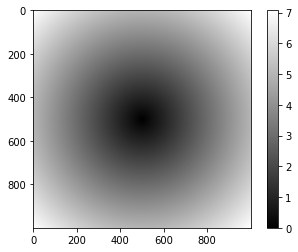

In [271]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

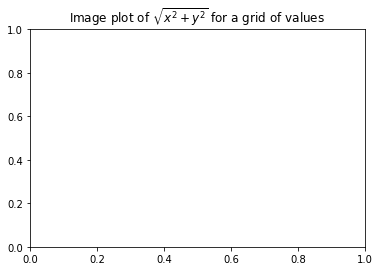

In [272]:
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [273]:
# 그림 4-3을 보면 계산된 값이 들어 있는 2차원 배열로부터 그래프 이미지를 생성하기 위해 matplotlib의 imshow 함수를 사용했다. 

In [274]:
# 4.3.1 배열 연산으로 조건절 표현하기

In [275]:
# numpy.where 함수는 x if 조건 else y 같은 삼항식의 벡터화된 버전이다. 다음과 같은 불리언 배열 하나와 값이 들어 있는 두 개의 배열이 있다고 하자.

In [276]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])

In [277]:
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

In [278]:
cond = np.array([True, False, True, True, False])

In [279]:
# cond의 값이 True일 때는 xarr의 값을 취하고 아니면 yarr의 값을 취하고 싶다면 리스트 표기법을 이용해서 다음처럼 작성할 수 있다.

In [280]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]

In [281]:
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [282]:
# 이 방법에는 몇 가지 문제가 있는데, 순수 파이썬으로 수행되기 때문에 큰 배열을 빠르게 처리하지 못한다. 또한 다차원 배열에서는 사용할 수 없는 문제가 있다.

In [283]:
# np.where를 사용하면 아주 간결하게 작성할 수 있다. 

In [284]:
result = np.where(cond, xarr, yarr)

In [285]:
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [286]:
# np.where의 두 번째와 세 번째 인자는 배열이 아니어도 상관없다. 둘 중 하나 혹은 둘 다 스칼라값이어도 동작한다. 데이터 분석에서 일반 where의 사용은 다른 배열에 기반한 새로운 배열을 생성한다.

In [287]:
# 임의로 생성된 데이터가 들어 있는 행렬이 있고 양수는 모두 2로, 음수는 모두 -2로 바꾸려면 np.where를 사용해서 쉽게 처리할 수 있다.

In [288]:
arr = np.random.randn(4, 4)

In [289]:
arr

array([[ 2.06592999, -0.71567917,  0.76327378,  0.75014069],
       [-0.16816085, -1.29437455,  0.14102079,  0.29943127],
       [ 0.11150639,  0.10503584, -0.50664966,  1.02323108],
       [ 0.48377488, -0.49160192,  1.06940134,  0.43798426]])

In [290]:
arr > 0

array([[ True, False,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False,  True],
       [ True, False,  True,  True]])

In [291]:
np.where(arr > 0, 2, -2)

array([[ 2, -2,  2,  2],
       [-2, -2,  2,  2],
       [ 2,  2, -2,  2],
       [ 2, -2,  2,  2]])

In [292]:
# np.where를 사용할 때 스칼라값과 배열을 조합할 수 있다. 예를 들어 arr의 모든 양수를 2로 바꿀 수 있다.

In [293]:
np.where(arr > 0, 2, arr)

array([[ 2.        , -0.71567917,  2.        ,  2.        ],
       [-0.16816085, -1.29437455,  2.        ,  2.        ],
       [ 2.        ,  2.        , -0.50664966,  2.        ],
       [ 2.        , -0.49160192,  2.        ,  2.        ]])

In [294]:
# np.where로 넘기는 배열은 그냥 크기만 같은 배열이거나 스칼라 값이 될 수 있다.

In [295]:
# 4.3.2 수학 메서드와 통계 메서드

In [297]:
# 배열 전체 혹은 배열에서 한 축을 따르는 자료에 대한 통계를 계산하는 수학 함수는 배열 메서드로 사용할 수 있다.

In [298]:
# 전체의 합(sum)이나 평균(mean), 표준편차(std)는 NumPy의 최상위 함수를 이용하거나 배열의 인스턴스 메서드를 사용해서 구할 수 있다.

In [299]:
# 임의의 정규 분포 데이터를 생성하고 집계해보자.

In [300]:
arr = np.random.randn(5, 4)

In [301]:
arr

array([[ 0.48788196,  1.21338759, -0.36759323, -0.85902522],
       [ 1.4703371 ,  1.64874311,  0.9795652 , -0.6363182 ],
       [-1.68308776, -0.44493788, -0.29319046,  0.22902092],
       [ 0.40804867, -0.41554565,  0.90295056,  0.01175869],
       [-1.33820474, -0.18737459,  1.13544127, -1.49338599]])

In [302]:
arr.mean()

0.038423568141588135

In [303]:
np.mean(arr)

0.038423568141588135

In [304]:
arr.sum()

0.7684713628317628

In [305]:
# mean이나 sum 같은 함수는 선택적으로 axis 인자를 받아서 해당 axis에 대한 통계를 계산하고 한 차수 낮은 배열을 반환한다.

In [306]:
arr.mean(axis=1)

array([ 0.11866278,  0.8655818 , -0.54804879,  0.22680307, -0.47088101])

In [307]:
arr.sum(axis=0)

array([-0.65502476,  1.81427258,  2.35717334, -2.7479498 ])

In [308]:
# 여기서 arr.sum(0)은 로우의 합을 구하라는 의미이며, arr.mean(1)은 모든 컬럼에서 평균을 구하라는 의미이다. 

In [309]:
# cumsum과 cumprod 메서드는 중간 계산값을 담고 있는 배열을 반환한다.

In [310]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])

In [311]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [312]:
# 다차원 배열에서 cumsum 같은 누산 함수는 같은 크기의 배열을 반환한다. 하지만 축을 지정하여 부분적으로 계산하면 낮은 차수의 슬라이스를 반환한다.

In [315]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [316]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [317]:
arr.cumsum(axis=0) 

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [318]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

In [319]:
# 167페이지 표 4-5에서 지원하는 모든 함수를 확인할 수 있다. 

In [320]:
# 4.3.3 불리언 배열을 위한 메서드

In [321]:
# 이전 메서드의 불리언값을 1(True) 또는 0(False)으로 강제할 수 있다. 따라서 sum 메서드를 실행하면 불리언 배열에서 True인 원소의 개수를 셀 수 있다.

In [329]:
arr = np.random.randn(100)

In [330]:
(arr > 0).sum() # 양수인 원소의 개수

46

In [331]:
# any와 all 메서드는 불리언 배열에 특히 유용하다. any 메서드는 하나 이상 값이 True인지 검사하고, all 메서드는 모든 원소가 True인지 검사한다.

In [332]:
bools = np.array([False, False, True, False])

In [334]:
bools.any()

True

In [337]:
bools.all()

False

In [338]:
# 이들 메서드는 불리언 배열이 아니어도 동작하는데, 0이 아닌 원소는 모두 True로 간주한다.